### 1. 도수분포표

20만건 관찰치(Observation)가 넘는 데이터셋의 명목형변수 `도수분포표`만들기 

* http://blog.naver.com/PostView.nhn?blogId=padosori60&logNo=220868082613

R에서 도수분포표나 교차표(분할표)를 작성하기 위해 사용되는 함수는 table, ftable, prop.table, margin.table, addmargins 등이 있다. 먼저  table( )함수는 매개변수가 한 개이면 도수분포표를, 두 개 이상이면 교차표를 출력하는 함수이다.
 
◆ table( …., exclude = dnn = list.names(…), ….)
    - ….. : 한 개 이상의 객체를 (character string을 포함하여) 설정할 수 있다. 한 개의 매개변수가 주어지면 도수분포표, 두 개 이상  
          의  객체가 주어지면 교차표가 주어진다. (둘 이상이 주어지는 경우 첫 번째가 행, 두 번째가 열 등의 순서이다)
    -  exclude : 교차표에서 제외할 수준의 값을 설정한다.
    -  dnn : 교차표의 행변수, 열변수 등에 사용되는 이름이다.

◆ ftable( )함수
ftable( )함수는 2차원 교차표일 경우 table( )함수와 비슷한 결과값을 얻지만 3차원 이상일 경우에는 table( )함수보다 유용한 결과를 얻을 수 있는 함수이다.
 
ftable( ….., exclude = c(NA, NaN), row, vars = NULL, col.vars = NULL)
          - …. : 교차표를 생성할 수 있는 R의 객체 (벡터, 데이터프레임, table함수를 
                       이용하여 얻은 결과값)
          - exclude : 각 변수에서 제외할 값
          - row.vars : 행에 사용할 변수의 번호 또는 변수명
          - col.vars : 열에 사용할 변수의 번호 또는 변수명


◆ prop.table( )함수
prop.table( )는 도수분포표, 교차표의 상대도수 값을 얻기위하여 이용
 
prop.table(x, margin = NULL)
       - x : table, ftable 함수를 이용하여 얻는 도수분포표 또는 교차표
       - margin : 상대도수를 계산할 때, 분모로 사용할 변수를 지정
                              NULL- 전체 합에 대한 상대도수
        -  1 -  첫 번째 변수(행)에 대한 상대도수
         - 2  -  두 번째 변수(열)에 대한 상대도수

◆ addmargins( ) 함수
행과 열의 합을 계산하기 위한 함수, table( ), ftable( ), prop.table( )함수군은 행과 열의 합을 계산하지 않는다.
 
addmargins(A, margin = seq_along(dim(A)), ….)
      - A : table( ), ftable( ), prop.table( )의 결과값을 설정

In [5]:
# 데이터셋 패키지 로딩
install.packages("hfligths")
library(hflights)

Warning message:
"package 'hfligths' is not available (for R version 3.6.1)"

In [6]:
str(hflights)
head(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
5424,2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
5425,2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
5426,2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
5427,2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
5428,2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
5429,2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0


In [7]:
# 특정변수보기
# table()함수는 데이터의 빈도수를 보여준다.
CountofDest <- table(hflights$Dest)
CountofDest


 ABQ  AEX  AGS  AMA  ANC  ASE  ATL  AUS  AVL  BFL  BHM  BKG  BNA  BOS  BPT  BRO 
2812  724    1 1297  125  125 7886 5022  350  504 2736  110 3481 1752    3 1692 
 BTR  BWI  CAE  CHS  CID  CLE  CLT  CMH  COS  CRP  CRW  CVG  DAL  DAY  DCA  DEN 
1762 2551  561 1200  410 2140 4735 1348 1657 4813  357 1535 9820  451 2699 5920 
 DFW  DSM  DTW  ECP  EGE  ELP  EWR  FLL  GJT  GPT  GRK  GRR  GSO  GSP  GUC  HDN 
6653  647 2601  729  110 3036 4314 2462  403 1618   42  677  630 1123   86  110 
 HNL  HOB  HRL  HSV  IAD  ICT  IND  JAN  JAX  JFK  LAS  LAX  LBB  LCH  LEX  LFT 
 402  309 3983  923 1980 1517 1750 2011 2135  695 4082 6064 1333  364  584 2313 
 LGA  LIT  LRD  MAF  MCI  MCO  MDW  MEM  MFE  MIA  MKE  MLU  MOB  MSP  MSY  MTJ 
2730 1579 1188 2306 3174 3687 2094 2399 1128 2463 1588  292 1674 2010 6823  164 
 OAK  OKC  OMA  ONT  ORD  ORF  PBI  PDX  PHL  PHX  PIT  PNS  PSP  RDU  RIC  RNO 
 690 3170 2044  952 5748  717 1253 1235 2367 5096 1664 1539  106 1740  900  243 
 RSW  SAN  SAT  SAV  SDF  S

In [8]:
# length() : 명목형변수 카운트
length(CountofDest)

[1] 116

In [9]:
# range() : 데이터의 범위를 표시, 최소값과 최대값을 표시
range(CountofDest)

[1]    1 9820

In [10]:
# 실습1 : 최소도착공항과 최대도착공항을 출력
CountofDest[CountofDest==1]    # 오거스터리저널 공항
CountofDest[CountofDest==9820] # 달라스 공항

AGS 
  1

DAL 
9820

In [11]:
# 실습2 : 도착횟수가 6000회가 넘는 공항은?
SelectedDest <- CountofDest[CountofDest > 6000]
SelectedDest


 ATL  DAL  DFW  LAX  MSY 
7886 9820 6653 6064 6823 

In [12]:
# 실습3 : 6000회가 넘는 공항의 전체합은? 
# addmargins() : 행과 열의 합을 계산하기 위한 함수
addmargins(SelectedDest, margin=1)


  ATL   DAL   DFW   LAX   MSY   Sum 
 7886  9820  6653  6064  6823 37246 

In [13]:
# R - 도수분포표/교차표 지원함수
# table(), ftable(), prop.table(), addmargins()함수

# 1. ftable() 
# 2차원 교차표일경우 table()함수와 비슷한 결과를 얻지만 
# 3차원 이상일 경우에는 table()함수보다 유용한 결과를 얻을 수 있다.
ftable(vs~gear, data=mtcars)

# 2. prop.table()
# 도수분포표, 교차표의 상대도수값을 얻기 위하여 사용
prop.table(table(mtcars$gear, mtcars$carb))
prop.table(table(mtcars$gear, mtcars$carb),margin=1)

# 3. addmargins()
# 행과 열의 합을 계산하기 위한 함수(table, ftable, prop.table은 행과 열의 합을 계산 안함)
addmargins(table(mtcars$gear, mtcars$carb))

     vs  0  1
gear         
3       12  3
4        2 10
5        4  1

   
          1       2       3       4       6       8
  3 0.09375 0.12500 0.09375 0.15625 0.00000 0.00000
  4 0.12500 0.12500 0.00000 0.12500 0.00000 0.00000
  5 0.00000 0.06250 0.00000 0.03125 0.03125 0.03125

   
            1         2         3         4         6         8
  3 0.2000000 0.2666667 0.2000000 0.3333333 0.0000000 0.0000000
  4 0.3333333 0.3333333 0.0000000 0.3333333 0.0000000 0.0000000
  5 0.0000000 0.4000000 0.0000000 0.2000000 0.2000000 0.2000000

,1,2,3,4,6,8,Sum
3,3,4,3,5,0,0,15
4,4,4,0,4,0,0,12
5,0,2,0,1,1,1,5
Sum,7,10,3,10,1,1,32


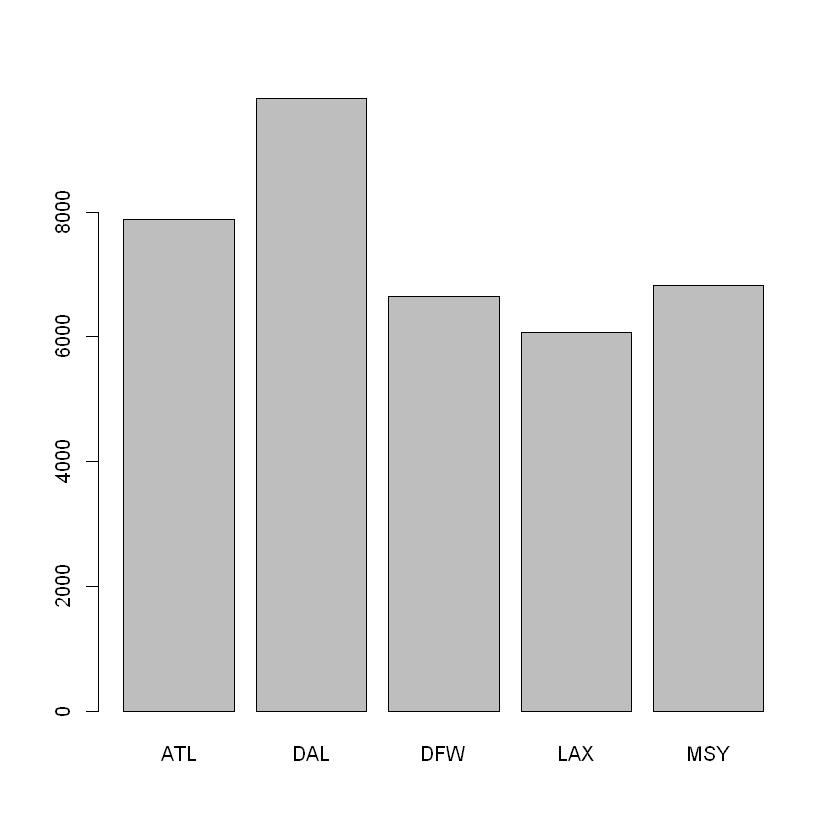

In [14]:
# 실습4 : 6000회가 넘는 공항의 시각화(R의 기본막대그래프 barplot을 이용)
barplot(SelectedDest)

#### 2. 대장암환자 자료분석

> 건강보험심사평가원의 보건의료 빅데이터 개방 시스템 : http://opendata.hira.or.kr/home.do

In [15]:
# 데이터로딩
# df()라는 내장함수가 있기 때문에 df는 변수명으로 사용하지 말 것
DF <- read.csv('../data/R/example_cancer.csv')
str(DF)

'data.frame':	18310 obs. of  8 variables:
 $ age            : int  75 52 67 62 70 76 55 72 64 71 ...
 $ sex            : Factor w/ 2 levels "남","여": 1 2 2 1 1 2 1 1 1 1 ...
 $ height         : Factor w/ 485 levels "100","130","130.2",..: 252 408 182 262 352 352 467 165 172 232 ...
 $ weight         : Factor w/ 638 levels "100","101","101.1",..: 333 446 349 263 343 563 463 243 363 248 ...
 $ dateOfoperation: Factor w/ 351 levels "2011-01-02","2011-01-03",..: 165 134 146 164 154 160 164 147 219 192 ...
 $ cancerStaging  : Factor w/ 5 levels "I","II","III",..: 1 4 3 1 2 3 2 3 1 2 ...
 $ hospitalization: int  48 17 10 11 10 10 12 18 15 35 ...
 $ diseaseCode    : Factor w/ 13 levels "C18","C180","C181",..: 9 9 9 9 4 11 9 4 13 11 ...


In [16]:
# 년령대별 도수분포 구하기
# cut() 함수 : 데이터를 구간별로 구분
# breaks=(1:11) : 1~11까지 * 10 -> 10,20....110
DegreeOfAge <- table(cut(DF$age, breaks=(1:11)*10))
DegreeOfAge


  (10,20]   (20,30]   (30,40]   (40,50]   (50,60]   (60,70]   (70,80]   (80,90] 
        3        77       482      1917      4558      5679      4598       962 
 (90,100] (100,110] 
       33         1 

In [17]:
# 행이름을 부여
rownames(DegreeOfAge) <- c('10대', '20대', '30대', '40대', '50대', '60대', 
                           '70대', '80대', '90대', '100대')
DegreeOfAge


 10대  20대  30대  40대  50대  60대  70대  80대  90대 100대 
    3    77   482  1917  4558  5679  4598   962    33     1 

In [18]:
install.packages("ggthemes")

package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\TJOEUN-JR\AppData\Local\Temp\RtmpUxIbRT\downloaded_packages


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggthemes' was built under R version 3.6.3"

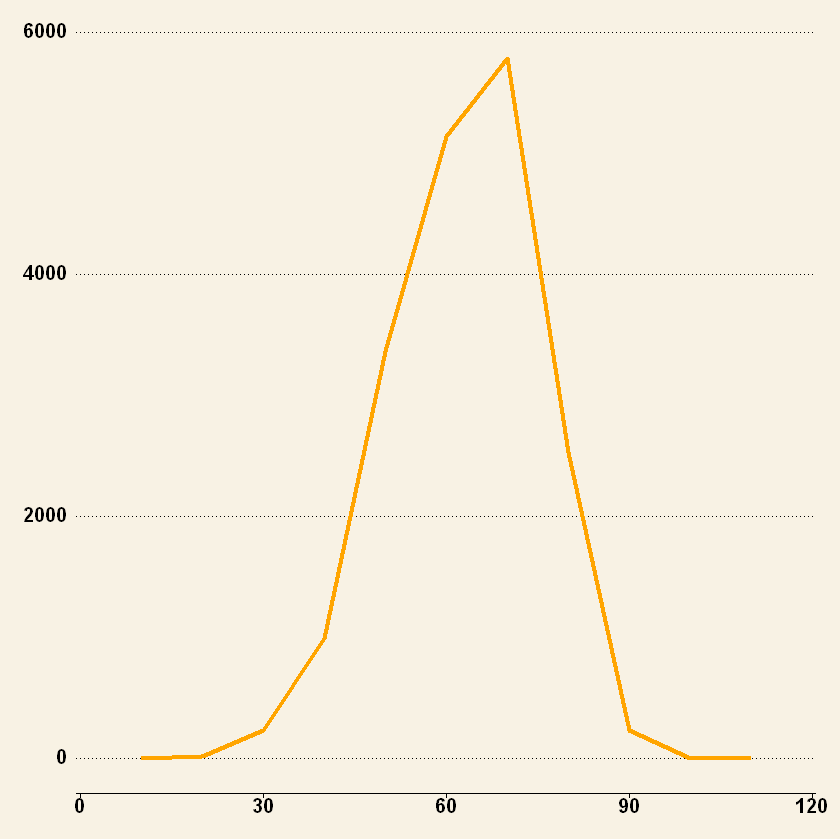

In [19]:
# 데이터시각화
library("ggplot2")
library(ggthemes)
ggplot(data=DF, aes(x=age)) +
    geom_freqpoly(binwidth=10, size=1.4, colour="orange") +
    theme_wsj()

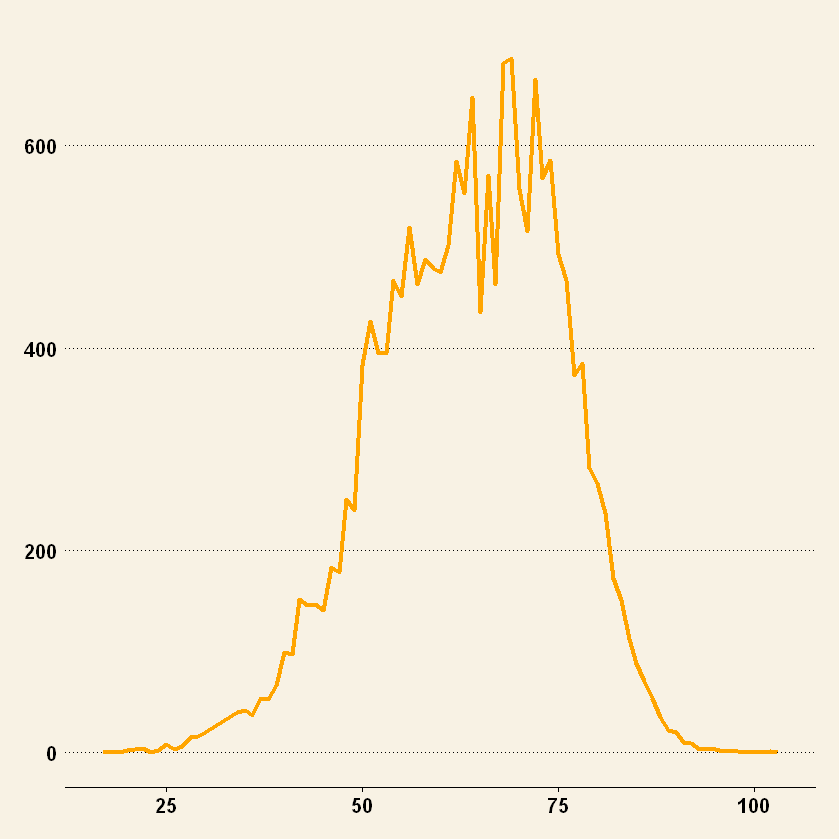

In [20]:
# binwidth=1 : 구간변경
ggplot(data=DF, aes(x=age)) +
    geom_freqpoly(binwidth=1, size=1.4, colour="orange") +
    theme_wsj()

#### 3. 전국 커피샵 폐업/영업상황 분석

>공공데이터포털 : http://www.data.go.kr

In [21]:
install.packages("data.table")
library(data.table)

package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\DESCRIPTION를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\DESCRIPTION로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\doc\datatable-benchmarking.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\doc\datatable-benchmarking.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\doc\datatable-benchmarking.Rmd를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\doc\datatable-benchmarking.Rmd로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\doc\datatable-faq.html를

"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\address.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\address.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\all.equal.data.table.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\all.equal.data.table.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\as.data.table.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\as.data.table.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\as.data.table.xts.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\as.data.table.xts.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in fil

"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\print.data.table.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\print.data.table.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\R.css를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\R.css로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\rbindlist.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\rbindlist.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\html\rleid.html를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\html\rleid.html로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramD

"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\Meta\links.rds를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\Meta\links.rds로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\Meta\nsInfo.rds를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\Meta\nsInfo.rds로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\Meta\package.rds를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\Meta\package.rds로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\Meta\Rd.rds를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\Meta\Rd.rds로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\

"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\genotypes_genome.txt를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\genotypes_genome.txt로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\grr.csv.gz를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\grr.csv.gz로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\isoweek_test.csv를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\isoweek_test.csv로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\issue_1087_utf8_bom.csv를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\issue_1087_utf8_bom.csv로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(s

"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\test1372-1.Rdata를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\test1372-1.Rdata로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\test1372.Rdata를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\test1372.Rdata로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\tests-DESCRIPTION를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\tests-DESCRIPTION로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\data.table\tests\tests.Rraw를 C:\ProgramData\Anaconda3\Lib\R\library\data.table\tests\tests.Rraw로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive


The downloaded binary packages are in
	C:\Users\TJOEUN-JR\AppData\Local\Temp\RtmpUxIbRT\downloaded_packages


In [22]:
system.time(data <- read.csv('../data/R/example_coffee.csv'))
system.time(DF <- fread('../data/R/example_coffee.csv', header=T, 
                        stringsAsFactors=T, data.table=F))

   user  system elapsed 
   2.25    0.01    2.28 

   user  system elapsed 
   0.56    0.05    0.61 

In [23]:
str(DF)
head(DF)

'data.frame':	46832 obs. of  23 variables:
 $ number              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ companyName         : Factor w/ 36991 levels "#11(Sharp eleven)",..: 1 3 4 5 6 7 8 9 10 11 ...
 $ adress              : Factor w/ 45170 levels "","강원도 강릉시 강동면 안인진리 3-5번지 통일공원 G동 2층",..: 32672 44985 14319 25658 35239 44592 44032 16782 4036 16970 ...
 $ adressBystreet      : Factor w/ 38866 levels "","강원도 강릉시 가작로 13, 1층 (교동)",..: 28058 38633 12180 22436 1 38386 37843 14490 3373 14482 ...
 $ dateOflicensing     : int  20080917 20101124 20130902 20121108 20020911 20130822 20140605 20111209 20130315 20110908 ...
 $ stateOfbusiness     : Factor w/ 2 levels "운영중","폐업 등": 1 1 1 1 2 1 1 1 1 1 ...
 $ dateOfclosure       : int  NA NA NA NA 20071105 NA NA NA NA NA ...
 $ startdateOfcessation: logi  NA NA NA NA NA NA ...
 $ duedateOfcessation  : logi  NA NA NA NA NA NA ...
 $ dateOfreOpen        : logi  NA NA NA NA NA NA ...
 $ areaOfsite          : logi  NA NA NA NA NA NA ...
 $ zip                

number,companyName,adress,adressBystreet,dateOflicensing,stateOfbusiness,dateOfclosure,startdateOfcessation,duedateOfcessation,dateOfreOpen,...,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
1,#11(Sharp eleven),서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44),"서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))",20080917,운영중,NA,NA,NA,NA,...,NA,2008,N,,20.80,NA,,휴게음식점,커피숍,NA
2,( 주)커피빈코리아청주지웰시티점,"충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 125, 126호(1층)","충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 125, 126호(1층))",20101124,운영중,NA,NA,NA,NA,...,NA,2010,N,,212.72,NA,,휴게음식점,커피숍,NA
3,(aA)더블에이,경상북도 경산시 사동 39번지 108-2호,"경상북도 경산시 백자로10길 3-11, 108-2호 (사동)",20130902,운영중,NA,NA,NA,NA,...,NA,2013,N,,20.04,NA,아파트지역,휴게음식점,커피숍,NA
4,(강서)카페치따,서울특별시 강서구 등촌동 63-12번지 외 2필지 어위쉬예다인 (지상 1층) 104호,"서울특별시 강서구 양천로 452, 1층 104호 (등촌동, 3동 어위쉬예다인)",20121108,운영중,NA,NA,NA,NA,...,NA,2012,N,,64.17,NA,,휴게음식점,커피숍,NA
5,(로즈버드)명동아바타,서울특별시 중구 명동2가 83-5번지 (아바타1층1218),,20020911,폐업 등,20071105,NA,NA,NA,...,0,2002,N,,11.40,0,,휴게음식점,커피숍,0
6,(루앤비카페(Lu n B cafe),충청북도 청주시 서원구 사직동 720-31번지 외7필지 (1층),"충청북도 청주시 서원구 사직대로 246 (사직동, (1층))",20130822,운영중,NA,NA,NA,NA,...,NA,2013,N,,10.99,NA,,휴게음식점,커피숍,NA


In [24]:
# 데이터정제 : 불필요한 변수등을 삭제
DF <- subset(DF, select=c(-adress, -adressBystreet, -dateOfclosure, -startdateOfcessation,
                          -duedateOfcessation, -dateOfreOpen, -zip))
str(DF)

'data.frame':	46832 obs. of  16 variables:
 $ number           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ companyName      : Factor w/ 36991 levels "#11(Sharp eleven)",..: 1 3 4 5 6 7 8 9 10 11 ...
 $ dateOflicensing  : int  20080917 20101124 20130902 20121108 20020911 20130822 20140605 20111209 20130315 20110908 ...
 $ stateOfbusiness  : Factor w/ 2 levels "운영중","폐업 등": 1 1 1 1 2 1 1 1 1 1 ...
 $ areaOfsite       : logi  NA NA NA NA NA NA ...
 $ waterwork        : Factor w/ 5 levels "","간이상수도",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ numOfmenWorker   : int  NA NA NA NA 0 NA NA NA NA NA ...
 $ yearOfStart      : int  2008 2010 2013 2012 2002 2013 2014 2011 2013 2011 ...
 $ multipleUse      : Factor w/ 3 levels "","N","Y": 2 2 2 2 2 2 2 2 2 2 ...
 $ grade            : Factor w/ 8 levels "","갑","관리",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sizeOfsite       : num  20.8 212.7 20 64.2 11.4 ...
 $ numOfwomenWorker : int  NA NA NA NA 0 NA NA NA NA NA ...
 $ vicintyOfsite    : Factor w/ 8 levels "","결혼예식장주변",..: 1 1 4 1 

In [25]:
# 실습1. 최초커피샵찾기
# na.rm+T : 이 옵션이 없으면 결측치때문에 range를 찾을 수 없다.
#           NA값을 제외하고 함수를 실행기 위한 옵션
range(DF$yearOfStart)
range(DF$yearOfStart, na.rm=T)

[1] NA NA

[1] 1964 2015

In [26]:
# 실습2. 현재 운영중인 가장 오래된 커피샵
subset(DF, subset=(yearOfStart == 1964)) # 가장오래된 커피샵인데 폐업
DFFilter <- subset(DF, subset=(stateOfbusiness == "운영중"))
range(DFFilter$yearOfStart, na.rm=T) 
subset(DFFilter, subset=(yearOfStart == 1967))

,number,companyName,dateOflicensing,stateOfbusiness,areaOfsite,waterwork,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
23035,23035,엠에스커피,19641125,폐업 등,NA,상수도전용,0,1964,N,,0,0,기타,휴게음식점,커피숍,0
46290,46290,홀릭,19640929,폐업 등,NA,,0,1964,N,기타,0,0,기타,휴게음식점,커피숍,0


[1] 1967 2015

,number,companyName,dateOflicensing,stateOfbusiness,areaOfsite,waterwork,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
24108,24108,왕관 커피숍,19671013,운영중,NA,상수도전용,0,1967,N,갑,76.02,1,기타,휴게음식점,커피숍,1
44934,44934,학커피숍,19670414,운영중,NA,,0,1967,N,,59.13,0,,휴게음식점,커피숍,0


In [27]:
# 실습3. 년도별 오픈한 커피샵의 갯수(빈도수)
table(DF$yearOfStart)


1964 1966 1967 1968 1969 1970 1971 1972 1974 1975 1976 1979 1980 1981 1982 1983 
   2    2    3    1    2    4    6    3    1    2    5    4    9    8   12    9 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
  11   18   21   21   26   23   25   28   37   50   48   48   41   54   54   46 
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
  89  183  398  799  648  654  863 1233 1579 2489 4172 5942 6315 7270 9905 3650 

Warning message:
"Removed 19 rows containing non-finite values (stat_count)."

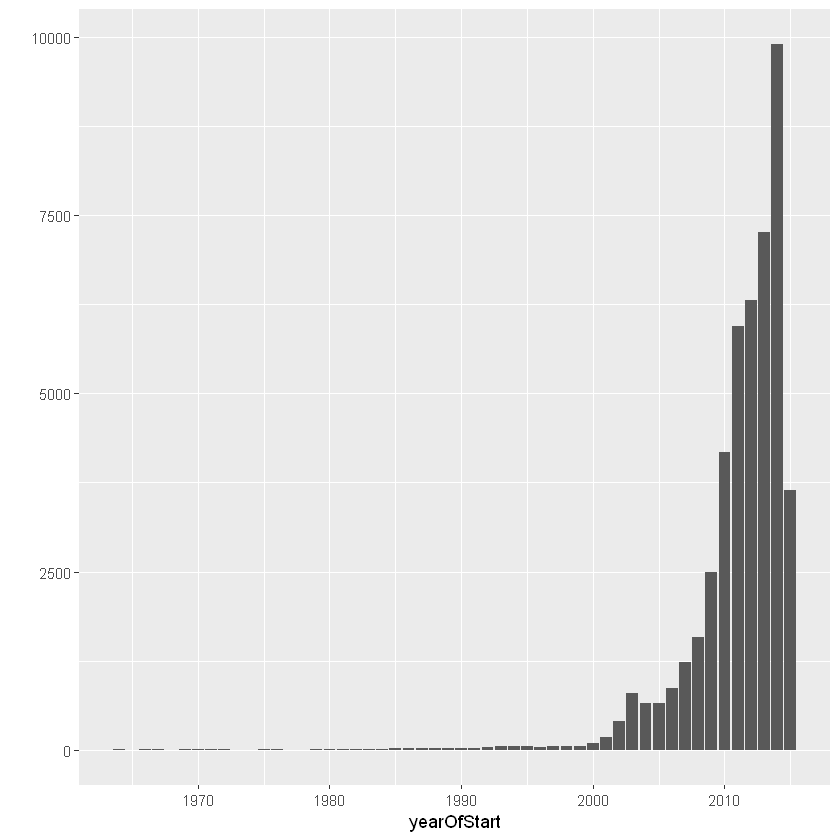

In [28]:
# 실습4. 데이터시각화(qplot: Quick plot 사용)
qplot(yearOfStart, data=DF, geom='bar')

In [29]:
# 영업상태 및 연도에 따른 분할표 생성
Freq <- table(DF$yearOfStart, DF$stateOfbusiness)
Freq
Freq1 <- table(DF$stateOfbusiness, DF$yearOfStart)
Freq1

      
       운영중 폐업 등
  1964      0       2
  1966      0       2
  1967      2       1
  1968      0       1
  1969      0       2
  1970      2       2
  1971      4       2
  1972      2       1
  1974      1       0
  1975      1       1
  1976      1       4
  1979      2       2
  1980      3       6
  1981      6       2
  1982      2      10
  1983      3       6
  1984      4       7
  1985      5      13
  1986      5      16
  1987      6      15
  1988     11      15
  1989      5      18
  1990      7      18
  1991      7      21
  1992      3      34
  1993     14      36
  1994     14      34
  1995     13      35
  1996     14      27
  1997     21      33
  1998     25      29
  1999     23      23
  2000     26      63
  2001     76     107
  2002    105     293
  2003    163     636
  2004    180     468
  2005    204     450
  2006    314     549
  2007    496     737
  2008    729     850
  2009   1229    1260
  2010   2503    1669
  2011   3961    1981
  2012   

         
          1964 1966 1967 1968 1969 1970 1971 1972 1974 1975 1976 1979 1980 1981
  운영중     0    0    2    0    0    2    4    2    1    1    1    2    3    6
  폐업 등    2    2    1    1    2    2    2    1    0    1    4    2    6    2
         
          1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
  운영중     2    3    4    5    5    6   11    5    7    7    3   14   14   13
  폐업 등   10    6    7   13   16   15   15   18   18   21   34   36   34   35
         
          1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
  운영중    14   21   25   23   26   76  105  163  180  204  314  496  729 1229
  폐업 등   27   33   29   23   63  107  293  636  468  450  549  737  850 1260
         
          2010 2011 2012 2013 2014 2015
  운영중  2503 3961 4642 6045 9125 3564
  폐업 등 1669 1981 1673 1225  780   86

In [30]:
# which() : TRUE값이 어디 있는지를 검색해주는 함수
a <- c(2:30)
a
which(a==3) # 2 : 2번째
which(a>10)
b <- c(T, F, T)
which(b)

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30

[1] 2

[1] 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29

[1] 1 3

In [31]:
# 1997년도이상인 데이터만 저장
colnames(Freq1)
which(colnames(Freq1) == '1997') # 30
which.max(colnames(Freq1)) # 48
Freq <- Freq1[, c(30:47)] # 48=2015년자료는 집계가 덜 되었기 때문에 생략
Freq

[1] "1964" "1966" "1967" "1968" "1969" "1970" "1971" "1972" "1974" "1975"
[11] "1976" "1979" "1980" "1981" "1982" "1983" "1984" "1985" "1986" "1987"
[21] "1988" "1989" "1990" "1991" "1992" "1993" "1994" "1995" "1996" "1997"
[31] "1998" "1999" "2000" "2001" "2002" "2003" "2004" "2005" "2006" "2007"
[41] "2008" "2009" "2010" "2011" "2012" "2013" "2014" "2015"

[1] 30

[1] 48

         
          1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
  운영중    21   25   23   26   76  105  163  180  204  314  496  729 1229 2503
  폐업 등   33   29   23   63  107  293  636  468  450  549  737  850 1260 1669
         
          2011 2012 2013 2014
  운영중  3961 4642 6045 9125
  폐업 등 1981 1673 1225  780

In [32]:
# 실습 1. 년도별 vs 폐업비율 (상대도수비율, prop.table())
# prop.table() : 도수분포표, 교차표의 상대도수의 값을 얻기 위해 사용되는 함수
PFreq <- prop.table(Freq, margin=2)
PFreq

         
                1997       1998       1999       2000       2001       2002
  운영중  0.38888889 0.46296296 0.50000000 0.29213483 0.41530055 0.26381910
  폐업 등 0.61111111 0.53703704 0.50000000 0.70786517 0.58469945 0.73618090
         
                2003       2004       2005       2006       2007       2008
  운영중  0.20400501 0.27777778 0.31192661 0.36384705 0.40227088 0.46168461
  폐업 등 0.79599499 0.72222222 0.68807339 0.63615295 0.59772912 0.53831539
         
                2009       2010       2011       2012       2013       2014
  운영중  0.49377260 0.59995206 0.66661057 0.73507522 0.83149931 0.92125189
  폐업 등 0.50622740 0.40004794 0.33338943 0.26492478 0.16850069 0.07874811

In [33]:
# 새로운 data.frame으로 생성
str(Freq)
str(PFreq)

NewDF <- data.frame(colnames(Freq), Freq[1,], Freq[2,], PFreq[1,], PFreq[2,])
NewDF

 'table' int [1:2, 1:18] 21 33 25 29 23 23 26 63 76 107 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "운영중" "폐업 등"
  ..$ : chr [1:18] "1997" "1998" "1999" "2000" ...
 'table' num [1:2, 1:18] 0.389 0.611 0.463 0.537 0.5 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "운영중" "폐업 등"
  ..$ : chr [1:18] "1997" "1998" "1999" "2000" ...


,colnames.Freq.,Freq.1...,Freq.2...,PFreq.1...,PFreq.2...
1997,1997,21,33,0.3888889,0.61111111
1998,1998,25,29,0.4629630,0.53703704
1999,1999,23,23,0.5000000,0.50000000
2000,2000,26,63,0.2921348,0.70786517
2001,2001,76,107,0.4153005,0.58469945
2002,2002,105,293,0.2638191,0.73618090
2003,2003,163,636,0.2040050,0.79599499
2004,2004,180,468,0.2777778,0.72222222
2005,2005,204,450,0.3119266,0.68807339
2006,2006,314,549,0.3638470,0.63615295


In [34]:
# 새로운 데이터프레임의 행과 열이름을 부여
rownames(NewDF) <- NULL # 년도가 변수로 있으니까 행이름은 필요 없다.
colnames(NewDF) <- c('Time', 'Open', 'Close', 'POpen', 'PClose')
NewDF

Time,Open,Close,POpen,PClose
1997,21,33,0.3888889,0.61111111
1998,25,29,0.4629630,0.53703704
1999,23,23,0.5000000,0.50000000
2000,26,63,0.2921348,0.70786517
2001,76,107,0.4153005,0.58469945
2002,105,293,0.2638191,0.73618090
2003,163,636,0.2040050,0.79599499
2004,180,468,0.2777778,0.72222222
2005,204,450,0.3119266,0.68807339
2006,314,549,0.3638470,0.63615295


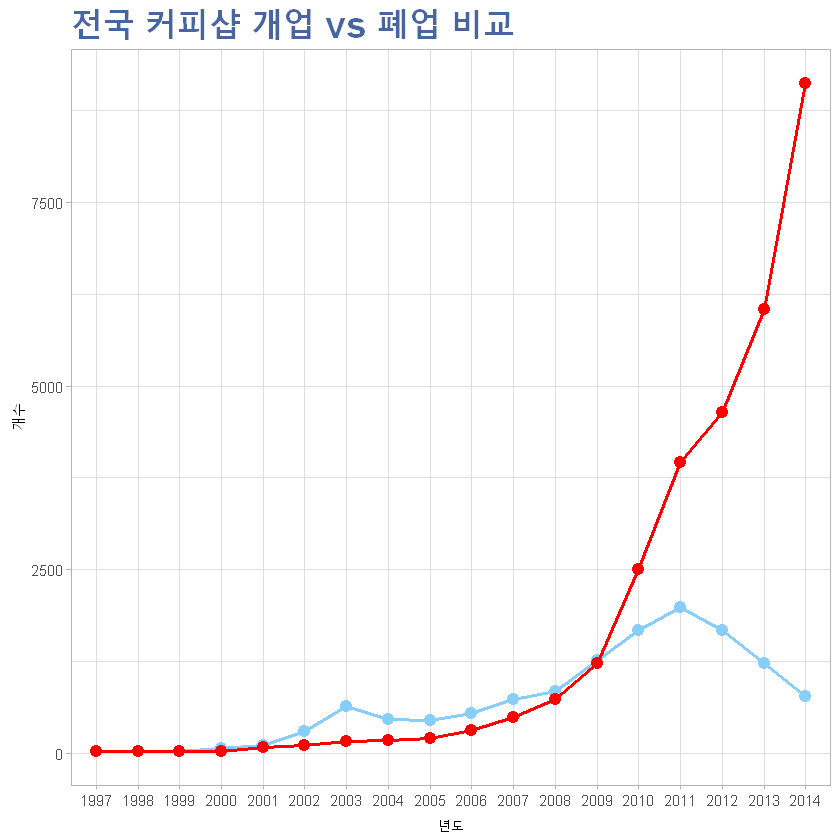

In [35]:
# 전국커피샵 개업 vs 폐업의 시각화
ggplot(NewDF, aes(x=factor(Time), y=Close, group=1)) +
    geom_line(colour="skyblue1", size=1) + # 폐업
    geom_point(colour="skyblue1", size=3) +
    geom_line(aes(y=Open), colour="red", size=1) + # 개업
    geom_point(aes(y=Open), colour="red", size=3) +
    ggtitle("전국 커피샵 개업 vs 폐업 비교") +
    theme_light() +
    xlab("년도") +
    ylab("개수") +
    theme(plot.title=element_text(lineheight =.8, face="bold", size=rel(2), colour="#49659F"))

In [36]:
# 개업과 폐업의 차이분석 비교 그래프
# reshape2 패키지 Wide포맷을 Long포맷으로 또는 반대로 데이터의 형태를 변경해주는 패키지
# ... melt()와 cast()함수를 사용하는 데 melt()함수는 wide를 long으로 변환
library(reshape2)


Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt



Using Time as id variables


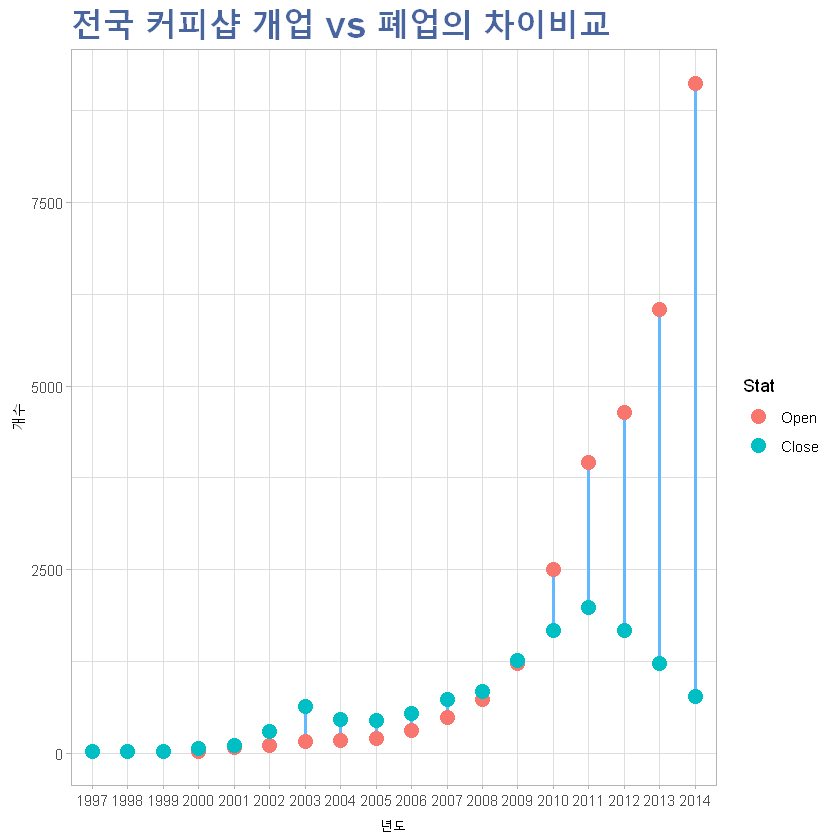

In [37]:
N <- subset(NewDF, select=c(-POpen, -PClose))
#N
N2 <- melt(N)
#N2
colnames(N2) <- c("Time","Stat","Value")

ggplot(N2, aes(x=factor(Time), y=Value, colour=Stat)) + 
    geom_line(colour="steelblue1", size=1) +
    geom_point(size=4) + 
    ggtitle("전국 커피샵 개업 vs 폐업의 차이비교") +
    theme_light() +
    xlab("년도") +
    ylab("개수") +
    theme(plot.title=element_text(lineheight =.8, face="bold", size=rel(2), colour="#49659F"))

#### 4. 전국 커피샵 규모 분석

In [38]:
ls()
rm(list=ls()) # 현재 세션에 있는 변수삭제
library(data.table)

[1] "a"            "b"            "CountofDest"  "data"         "DegreeOfAge" 
 [6] "DF"           "DFFilter"     "Freq"         "Freq1"        "N"           
[11] "N2"           "NewDF"        "PFreq"        "SelectedDest"

In [39]:
DF <- fread('../data/R/example_coffee.csv', header=T, stringsAsFactors=T, data.table=F)

# 사업자의 규모정보만 별도 객체에 저장
Size <- DF$sizeOfsite
# Size
# table(Size)

In [40]:
# 자료의 특성 파악
summary(Size)

# 결과분석
# 결측치 19개, 평균은 75.53, 최대규모는 24075.00(이상치일 가능성이 농후)
# 결측치와 이상치를 제거해야 한다.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    0.00    28.12    50.00    75.53    93.75 24075.00       19 

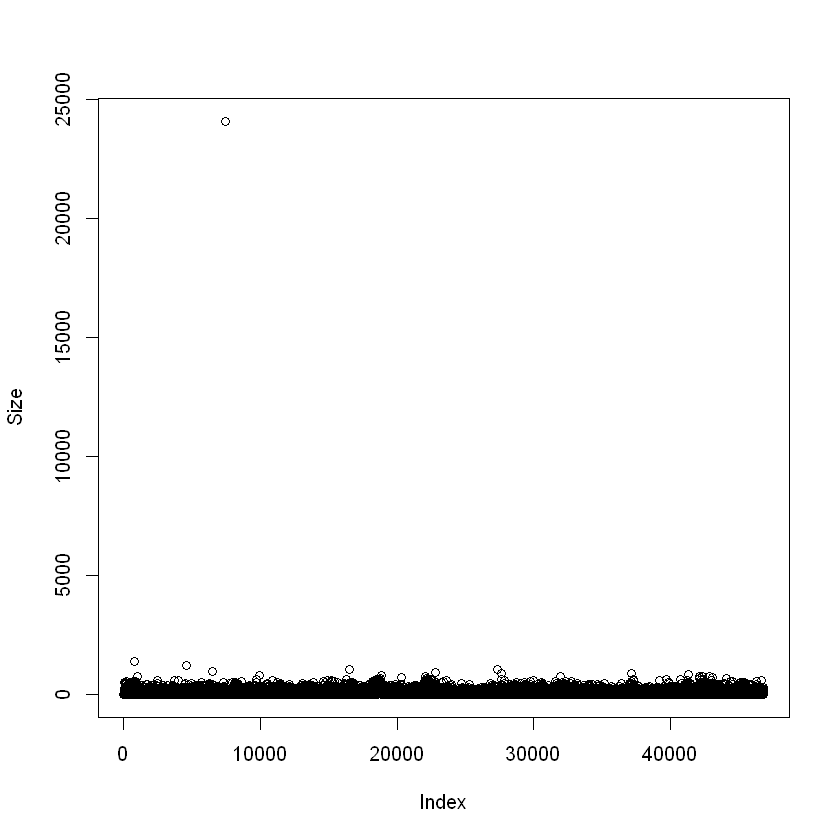

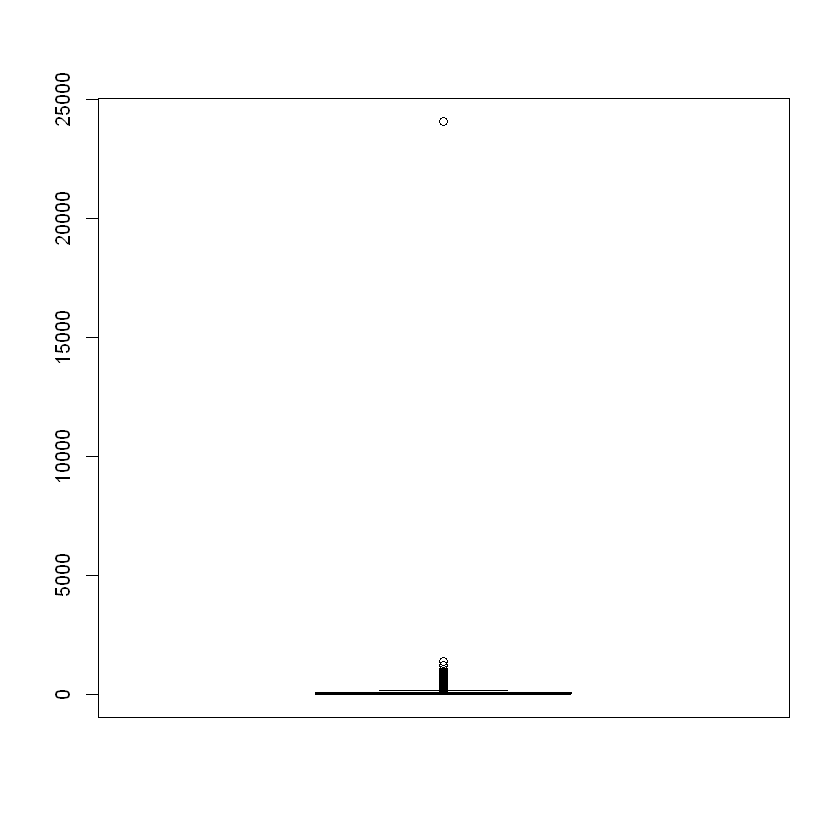

In [41]:
# 이상치확인 : boxplot으로 시각화
plot(Size)
boxplot(Size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   28.12   50.00   74.92   93.73  982.03      24 

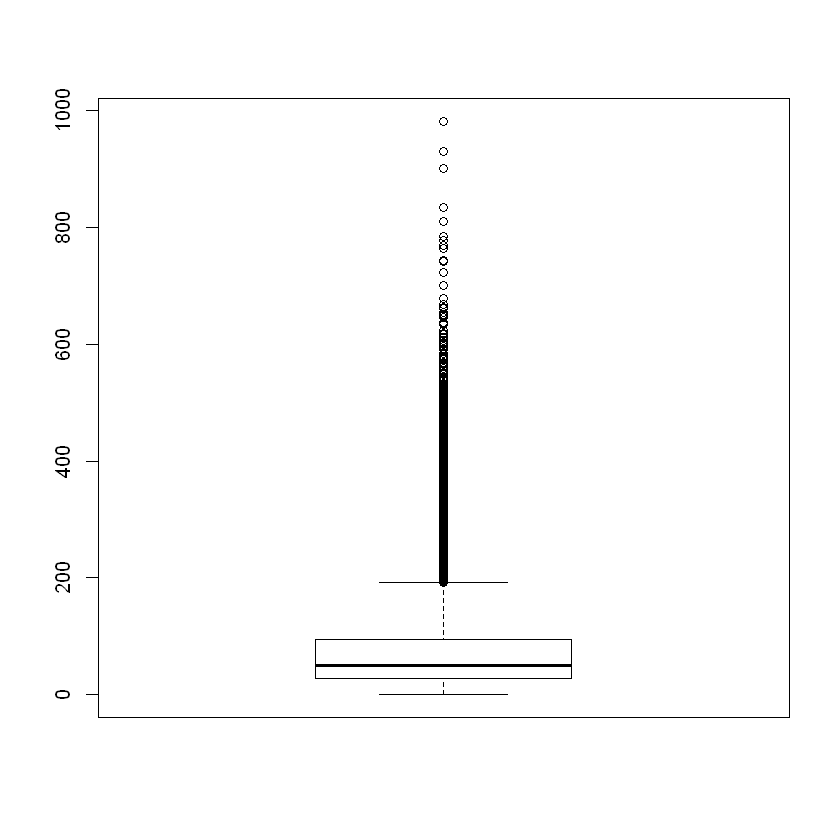

In [42]:
# 이상치를 삭제
Size[Size > 1000] <- NA
summary(Size)
boxplot(Size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.25   30.00   51.91   77.13   95.30  982.03 

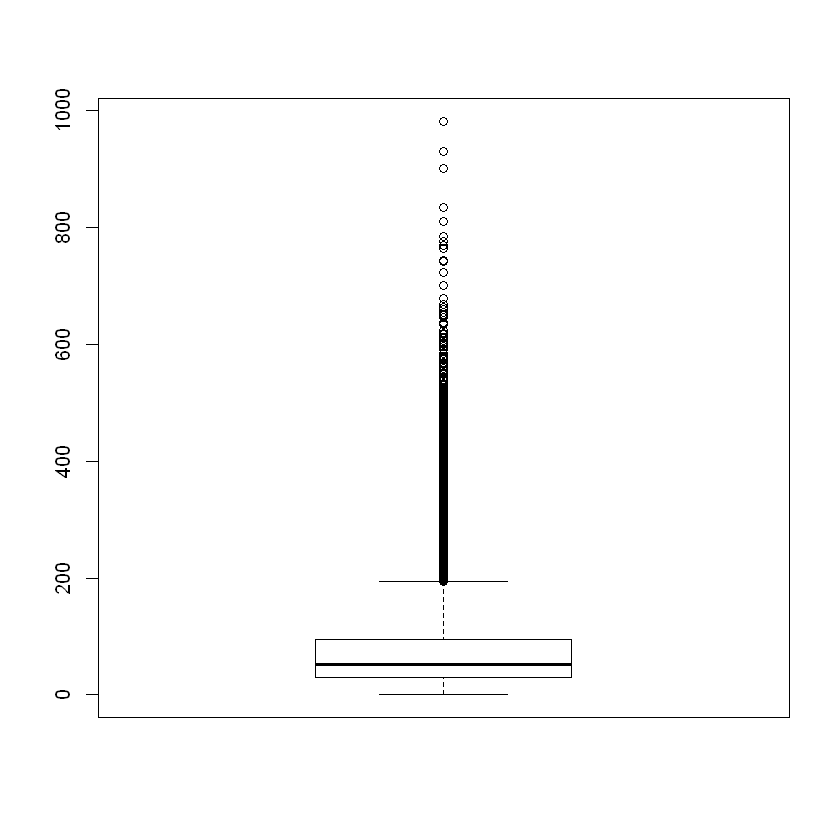

In [43]:
# 0과 결측치를 삭제
Size[Size == 0] <- NA

# R에서 결측치를 확인 및 처리 : is.na(), na.omit(), complete.cases()
Size <- Size[complete.cases(Size)] # 벡터에서 이상치를 완전히 제거
summary(Size)
boxplot(Size)

In [44]:
# 실습 1. 20개의 구간으로 자료를 생성
DegreeOfSize <- table(cut(Size, breaks=(0:60)*20))
DegreeOfSize


             (0,20]             (20,40]             (40,60]             (60,80] 
               6026               11303                8293                5283 
           (80,100]           (100,120]           (120,140]           (140,160] 
               4239                2246                1751                1297 
          (160,180]           (180,200]           (200,220]           (220,240] 
                959                 882                 568                 512 
          (240,260]           (260,280]           (280,300]           (300,320] 
                394                 331                 347                 179 
          (320,340]           (340,360]           (360,380]           (380,400] 
                191                 112                 105                  94 
          (400,420]           (420,440]           (440,460]           (460,480] 
                 81                  60                  42                  34 
          (480,500]        

Warning message:
"Removed 1060 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

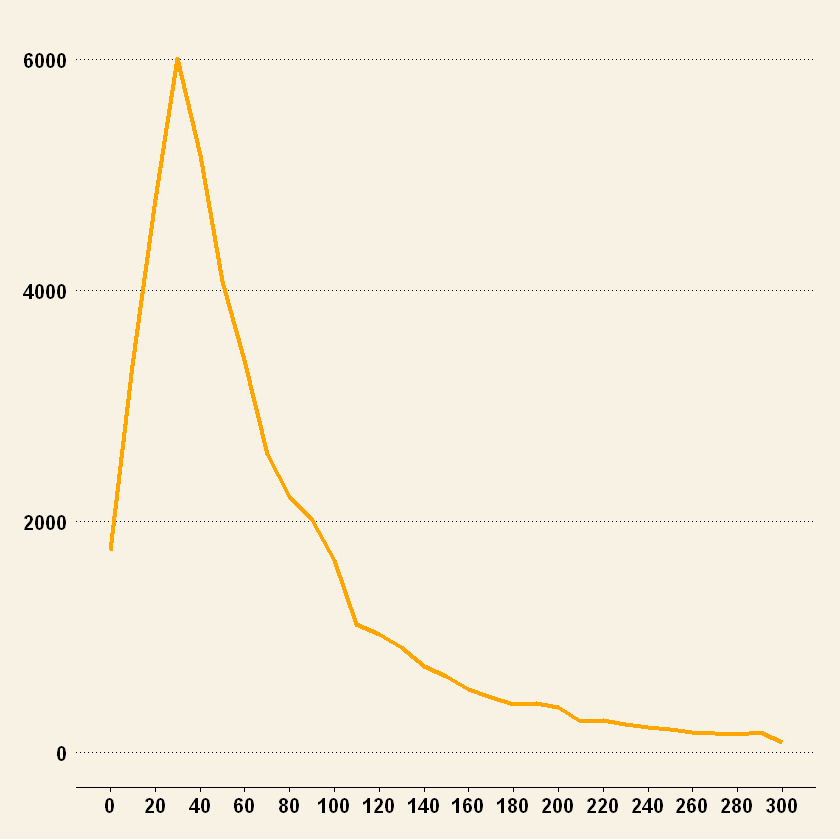

In [45]:
# 실습 2. 시각화 (freqpoly)
library(ggplot2)
library(ggthemes)

ggplot(data=DF, aes(x=sizeOfsite)) +
    geom_freqpoly(binwidth=10, size=1.2, colour="orange") +
    scale_x_continuous(limits = c(0, 300), breaks = seq(0,300, 20)) +
    theme_wsj()

##### 5. 전국인구조사자료분석(전처리)

>통계청에서 작성한 전국 인구조사 자료가 시도별, 인구수 데이터셋으로 데이터전처리가 많아서 조금 어려운 실습

In [46]:
# 문자열은 factor형으로 인식되기 때문에 stringsAsFactors=F로 로딩
DF <- read.csv('../data/R/example_population.csv', stringsAsFactors=F)
str(DF)
head(DF)

'data.frame':	281 obs. of  7 variables:
 $ City      : chr  "서울특별시  (1100000000)" "서울특별시 종로구 (1111000000)" "서울특별시 중구 (1114000000)" "서울특별시 용산구 (1117000000)" ...
 $ Population: chr  "10,078,850" "155,695" "126,817" "235,186" ...
 $ Households: chr  "4,197,478" "72,882" "59,614" "108,138" ...
 $ PersInHou : num  2.4 2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 ...
 $ Male      : chr  "4,962,774" "76,962" "63,292" "114,119" ...
 $ Female    : chr  "5,116,076" "78,733" "63,525" "121,067" ...
 $ SexRatio  : num  0.97 0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 ...


City,Population,Households,PersInHou,Male,Female,SexRatio
서울특별시 (1100000000),"10,078,850","4,197,478",2.40,"4,962,774","5,116,076",0.97
서울특별시 종로구 (1111000000),"155,695","72,882",2.14,"76,962","78,733",0.98
서울특별시 중구 (1114000000),"126,817","59,614",2.13,"63,292","63,525",1.00
서울특별시 용산구 (1117000000),"235,186","108,138",2.17,"114,119","121,067",0.94
서울특별시 성동구 (1120000000),"298,145","126,915",2.35,"148,265","149,880",0.99
서울특별시 광진구 (1121500000),"362,197","158,769",2.28,"177,946","184,251",0.97


In [47]:
# 문자열정리를 위해 stringr
library(stringr)

In [48]:
# 서울특별시 (1100000000)
# 서울특별시 종로구 (1111000000)
# 서울특별시, 종로구로 분리 및 (1100000000)는 삭제
temp <- str_split_fixed(DF[,1], "\\(", 2)
temp %>% head()

서울특별시,1100000000)
서울특별시 종로구,1111000000)
서울특별시 중구,1114000000)
서울특별시 용산구,1117000000)
서울특별시 성동구,1120000000)
서울특별시 광진구,1121500000)


In [49]:
# 공백을 기준을 시구를 분리
NewCity <- str_split_fixed(temp[,1], " ", 2)
NewCity %>% head()

서울특별시,
서울특별시,종로구
서울특별시,중구
서울특별시,용산구
서울특별시,성동구
서울특별시,광진구


In [50]:
# 컬럼이름을 변경 및 변수합치기
colnames(NewCity) <- c("Proviences", "City")
DF <- data.frame(NewCity, DF[,c(2:7)])
DF %>% tail()

,Proviences,City,Population,Households,PersInHou,Male,Female,SexRatio
276,경상남도,함양군,"40,314","19,229",2.10,"19,259","21,055",0.91
277,경상남도,거창군,"63,069","27,724",2.27,"30,582","32,487",0.94
278,경상남도,합천군,"48,856","24,193",2.02,"23,231","25,625",0.91
279,제주특별자치도,,"615,250","251,478",2.45,"308,627","306,623",1.01
280,제주특별자치도,제주시,"454,673","182,709",2.49,"227,549","227,124",1.00
281,제주특별자치도,서귀포시,"160,577","68,769",2.34,"81,078","79,499",1.02


In [51]:
# City값중 빈값(결측치)을 NA로 변경
DF[DF==" "] <- NA
tail(DF)

,Proviences,City,Population,Households,PersInHou,Male,Female,SexRatio
276,경상남도,함양군,"40,314","19,229",2.10,"19,259","21,055",0.91
277,경상남도,거창군,"63,069","27,724",2.27,"30,582","32,487",0.94
278,경상남도,합천군,"48,856","24,193",2.02,"23,231","25,625",0.91
279,제주특별자치도,NA,"615,250","251,478",2.45,"308,627","306,623",1.01
280,제주특별자치도,제주시,"454,673","182,709",2.49,"227,549","227,124",1.00
281,제주특별자치도,서귀포시,"160,577","68,769",2.34,"81,078","79,499",1.02


In [52]:
# 결츨치제거
DF <- DF[complete.cases(DF), ]
tail(DF)

,Proviences,City,Population,Households,PersInHou,Male,Female,SexRatio
275,경상남도,산청군,"36,122","17,985",2.01,"17,630","18,492",0.95
276,경상남도,함양군,"40,314","19,229",2.10,"19,259","21,055",0.91
277,경상남도,거창군,"63,069","27,724",2.27,"30,582","32,487",0.94
278,경상남도,합천군,"48,856","24,193",2.02,"23,231","25,625",0.91
280,제주특별자치도,제주시,"454,673","182,709",2.49,"227,549","227,124",1.00
281,제주특별자치도,서귀포시,"160,577","68,769",2.34,"81,078","79,499",1.02


In [53]:
# 인구수등 문자열을 수치형으로 변경
# sapply(변수, 함수)
# gsub(",", "", 데이터) : 컴마(,)를 제거
str(DF)

for (i in 3:8) {
    DF[,i] <- sapply(DF[,i], function(x) gsub(",", "", x))
    DF[,i] <- as.character(DF[,i])
    DF[,i] <- as.numeric(DF[,i])
}
str(DF)                    

'data.frame':	263 obs. of  8 variables:
 $ Proviences: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ City      : Factor w/ 241 levels " ","가평군 ",..: 188 189 158 105 32 65 190 106 6 63 ...
 $ Population: chr  "155,695" "126,817" "235,186" "298,145" ...
 $ Households: chr  "72,882" "59,614" "108,138" "126,915" ...
 $ PersInHou : num  2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 2.57 ...
 $ Male      : chr  "76,962" "63,292" "114,119" "148,265" ...
 $ Female    : chr  "78,733" "63,525" "121,067" "149,880" ...
 $ SexRatio  : num  0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 0.97 ...
'data.frame':	263 obs. of  8 variables:
 $ Proviences: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ City      : Factor w/ 241 levels " ","가평군 ",..: 188 189 158 105 32 65 190 106 6 63 ...
 $ Population: num  155695 126817 235186 298145 362197 ...
 $ Households: num  72882 59614 108138 126915 158769 ...
 $ PersInHou : num  2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 2.57 ...
 $ Male 

In [54]:
# 데이터전처리완료
# 시도별로 인구수합계구하기
# tapply() : 그룹별로 특정변수에 동일한 함수를 적용
# tapply(적용할 변수, 그룹지울변수, 적용할 함수)
ProPopul <- tapply(DF$Population, DF$Proviences, sum)
ProPopul

강원도         경기도       경상남도       경상북도     광주광역시 
       1547166       18723822        4428762        3215695        1476974 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
       2491137        1525656        3517491       10078850             NA 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
       1169768        2914271        1902638        2523806         615250 
      충청남도       충청북도 
       2671383        2414568

In [55]:
# Factor변수로 정리
# 세종특별자치시 <NA> : 세종시에는 City값이 없어 NA로 정리
# 인구수가 지나치게 적어 다른 시도와 비교하기가 어려워 삭제
DF[,1] <- factor(DF[,1])
ProPopul <- tapply(DF$Population, DF$Proviences, sum)
ProPopul

강원도         경기도       경상남도       경상북도     광주광역시 
       1547166       18723822        4428762        3215695        1476974 
    대구광역시     대전광역시     부산광역시     서울특별시     울산광역시 
       2491137        1525656        3517491       10078850        1169768 
    인천광역시       전라남도       전라북도 제주특별자치도       충청남도 
       2914271        1902638        2523806         615250        2671383 
      충청북도 
       2414568

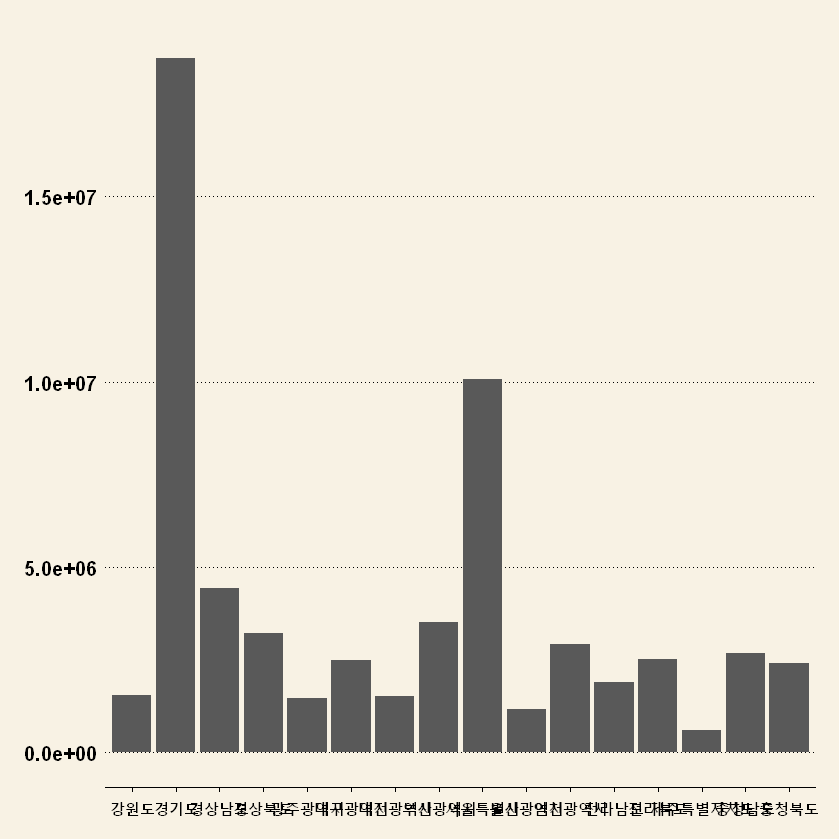

In [56]:
# 시도별 인구수데이터를 시각화
ggplot(DF, aes(x=Proviences, y=Population), fill=Proviences) +
    geom_bar(stat='identity') +
    theme_wsj()

In [57]:
# 파일저장
write.csv(DF, '../data/R/example_population_f.csv')

In [58]:
result <- read.csv('../data/R/example_population_f.csv')
head(result)

X,Proviences,City,Population,Households,PersInHou,Male,Female,SexRatio
2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
3,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
4,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
5,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
6,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
7,서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


##### 6. lattice패키지

>3차원 데이터를 대상으로 그 데이터들의 상관관계를 보여주는 그래프

In [59]:
data(quakes) # 지진관련 내장데이터셋
head(quakes)
library(lattice)

lat,long,depth,mag,stations
-20.42,181.62,562,4.8,41
-20.62,181.03,650,4.2,15
-26.00,184.10,42,5.4,43
-17.97,181.66,626,4.1,19
-20.42,181.96,649,4.0,11
-19.68,184.31,195,4.0,12


[1] 40

[1] 680

[1]  40 120 200 280 360 440 520 600 680

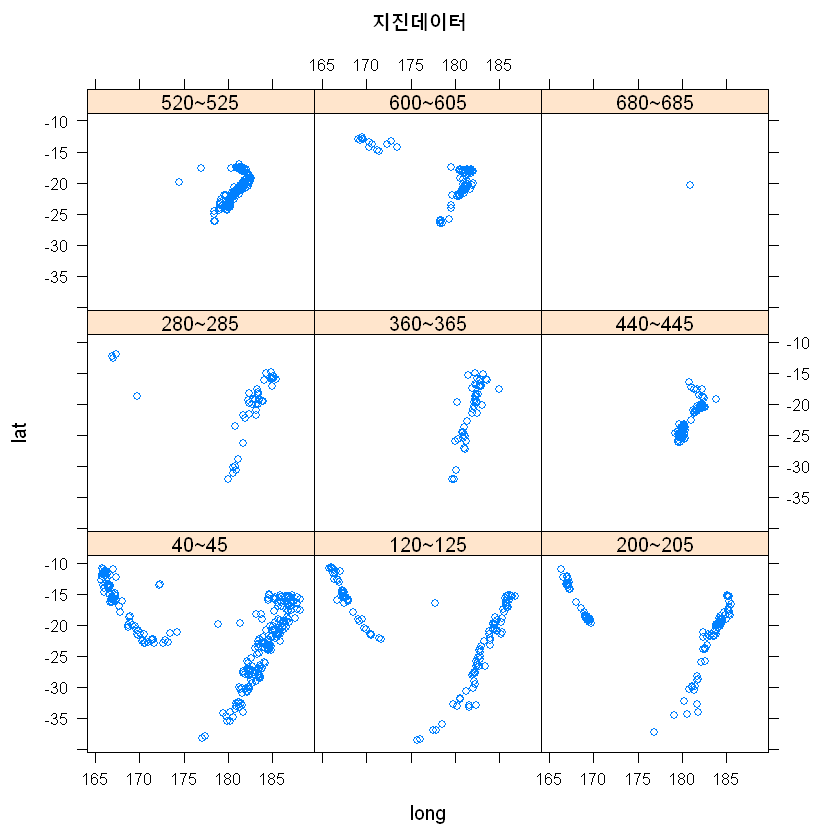

In [60]:
mini = min(quakes$depth) # 최소진앙지
maxi = max(quakes$depth) # 최대진앙지
mini
maxi
# 시각화하기 위해 진앙지 구간크기를 설정
r = ceiling(maxi-mini)/8 # 8구간
inf = seq(mini, maxi, r)
inf

# 지진데이터를 구간별 작업을 위해 factor변수로 변경
quakes$depth.cat = factor(floor((quakes$depth-mini)/r), labels=paste(inf, inf+5, sep="~"))
# quakes$depth.cat 
xyplot(lat~long|depth.cat, data=quakes, main='지진데이터')

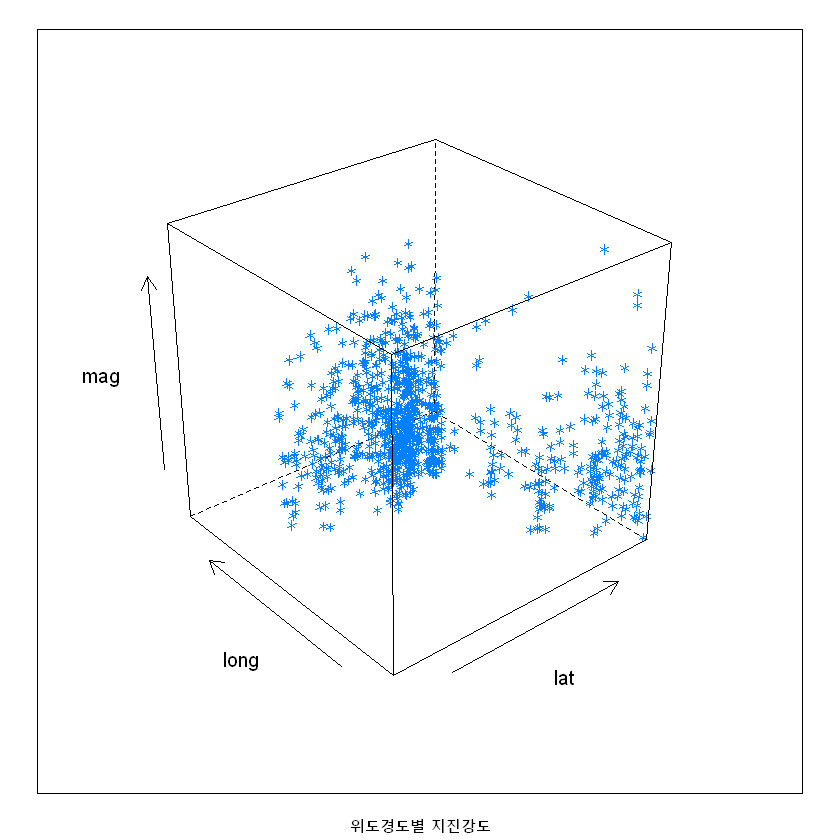

In [61]:
# 3차원 그래프
# cloud(z축~x축+y축, data=데이터셋, sub=타이틀)
cloud(mag~lat+long, data=quakes, sub="위도경도별 지진강도")

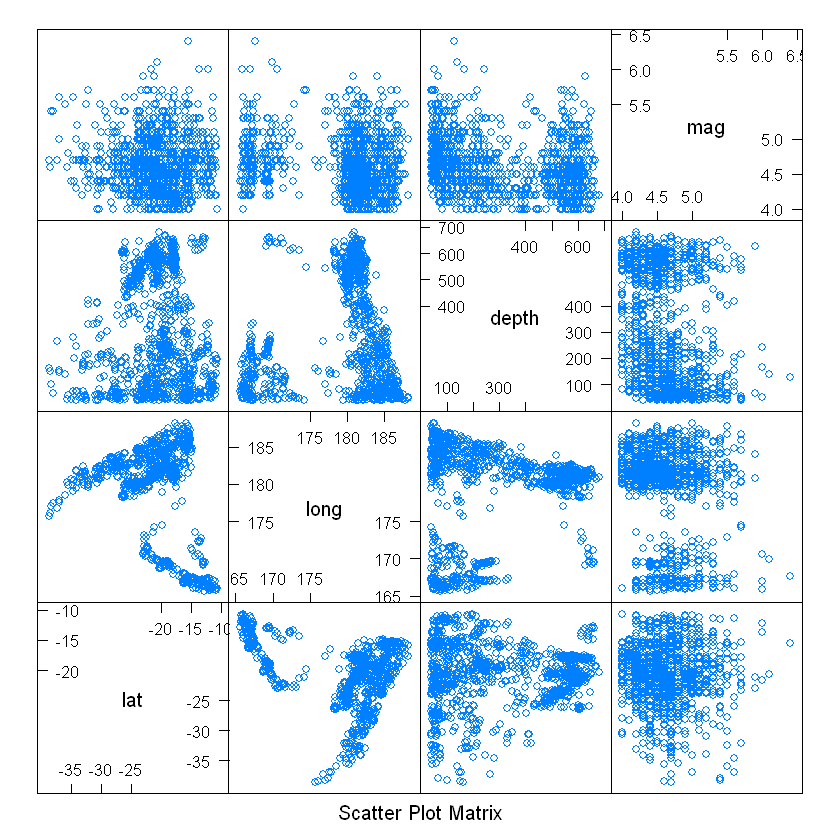

In [62]:
# 산점도 매트릭스
splom(quakes[1:4])

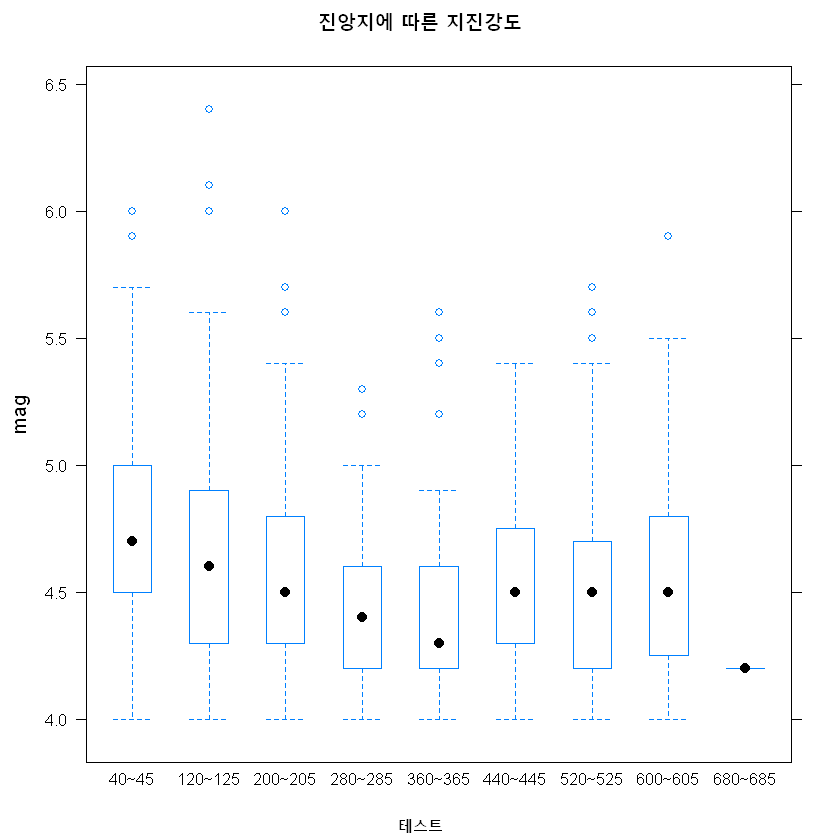

In [63]:
# 깊이에 따른 지진강도
bwplot(mag~depth.cat, data=quakes, main="진앙지에 따른 지진강도",sub="테스트")